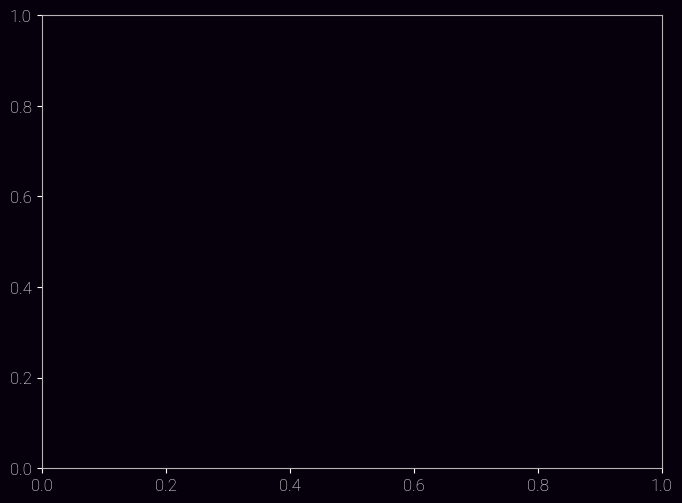

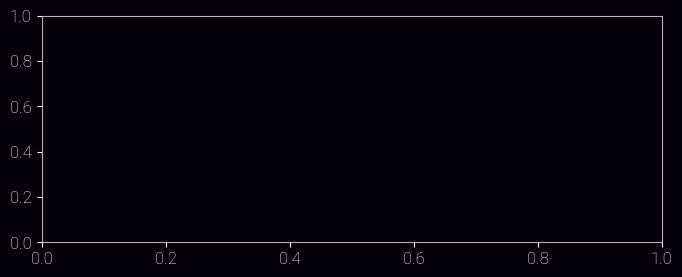

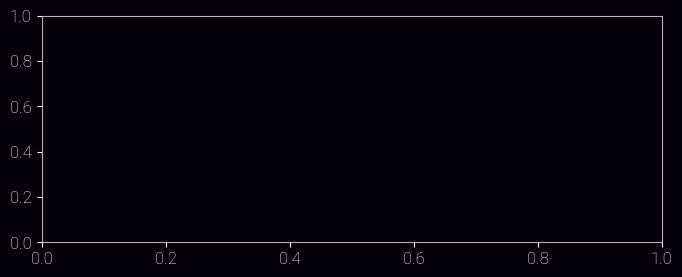

In [1]:
%matplotlib inline

import mysql.connector
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.cm as cm
from matplotlib.collections import LineCollection
from matplotlib.collections import PolyCollection
from stats_queries import sma, ema, rsi, bollinger, set_recursive_iterations, get_table

def plot_prices(fig, ax, values):
    
    x = np.array([mdates.date2num(x) for x in values[:,0]])
    y = np.array([float(i) for i in values[:,1]])

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    norm = plt.Normalize(x.min(), x.max())
    lc = LineCollection(segments, cmap=cm.plasma, norm=norm)

    lc.set_array(x)
    lc.set_linewidth(1.5)
    line = ax.add_collection(lc)
    ax.autoscale_view()

    m = cm.ScalarMappable(norm=norm, cmap=cm.plasma)
    for segment in segments:
        ax.fill_between(segment[:,0], segment[:,1], interpolate=True, color=m.to_rgba(segment[0,0]), alpha=0.05)



def format_graph(fig, ax, table, graph="price"):
    ax.clear()
    ax.grid(alpha=0.1)
    if graph == "rsi":
        ax.set_title(f"RSI - {table}/USD")
        ax.set_xlabel("Date")
        ax.set_ylabel("RSI (%)")
    elif graph == "price":
        ax.set_title(f"Price Chart - {table}/USD")
        ax.set_xlabel("Date")
        ax.set_ylabel("Price (USD)")
        ax.yaxis.set_major_formatter('${x:1.2f}')
    elif graph == "macd":
        ax.set_title(f"MACD - {table}/USD")
        ax.set_xlabel("Date")
        ax.set_ylabel("MACD")
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))

plt.style.use("./style.mplstyle")
plt.tight_layout()

fig = plt.figure(1)
fig2 = plt.figure(2, figsize=(8,3))
fig3 = plt.figure(3, figsize=(8,3))
ax = []
ax.append(fig.add_subplot())
ax.append(fig2.add_subplot())
ax.append(fig3.add_subplot())

mydb = mysql.connector.connect(
  host="localhost",
  user="devian",
  password="oursql",
  database="testing"
)

mycursor = mydb.cursor()

In [2]:
coin = "SHIB"
format_graph(fig, ax[0], coin)
format_graph(fig2, ax[1], coin, graph="rsi")
format_graph(fig3, ax[2], coin, graph="macd")

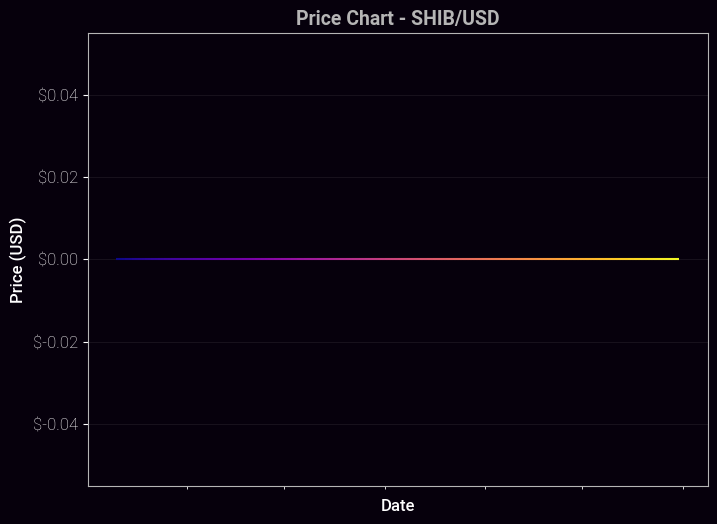

In [3]:
mycursor.execute(set_recursive_iterations(100000))
mycursor.execute(get_table(coin))
price_table = np.array(mycursor.fetchall())
plot_prices(fig, ax[0], price_table)
display(fig)

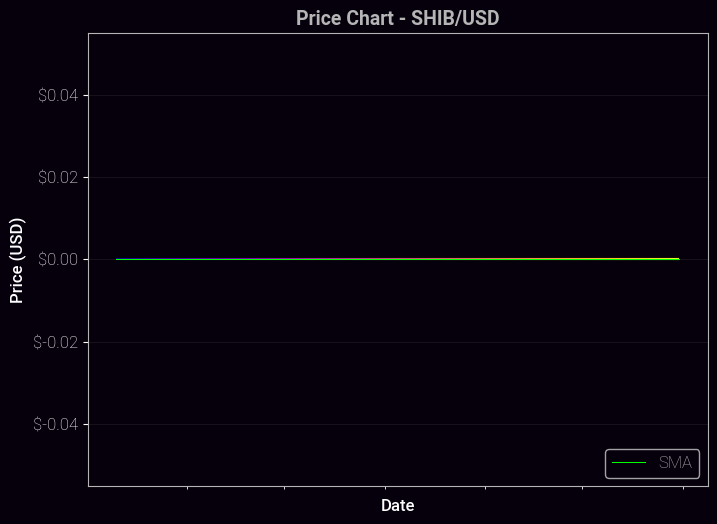

In [4]:
mycursor.execute(sma(coin, 20))
sma_table = np.array(mycursor.fetchall())
ax[0].plot(sma_table[:,0], sma_table[:,1], color="lime", linewidth=0.75, label="SMA")
ax[0].legend(loc="lower right")
display(fig)

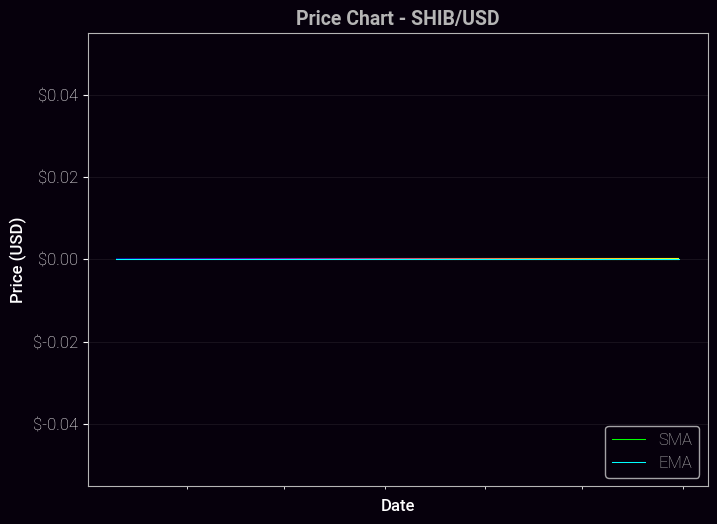

In [5]:
mycursor.execute(ema(coin, 20))
ema_table = np.array(mycursor.fetchall())
ax[0].plot(ema_table[:,0], ema_table[:,1], color="cyan", linewidth=0.75, label="EMA")
ax[0].legend(loc="lower right")
display(fig)

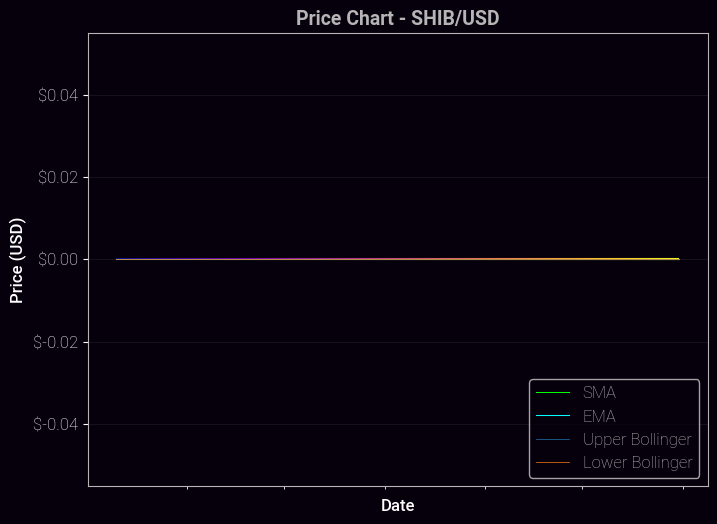

In [6]:
mycursor.execute(bollinger(coin, 20))
bollinger_table = np.array(mycursor.fetchall())
ax[0].plot(bollinger_table[:,0], bollinger_table[:,1], linewidth=0.5, label="Upper Bollinger")
ax[0].plot(bollinger_table[:,0], bollinger_table[:,2], linewidth=0.5, label="Lower Bollinger")
ax[0].legend(loc="lower right")
display(fig)

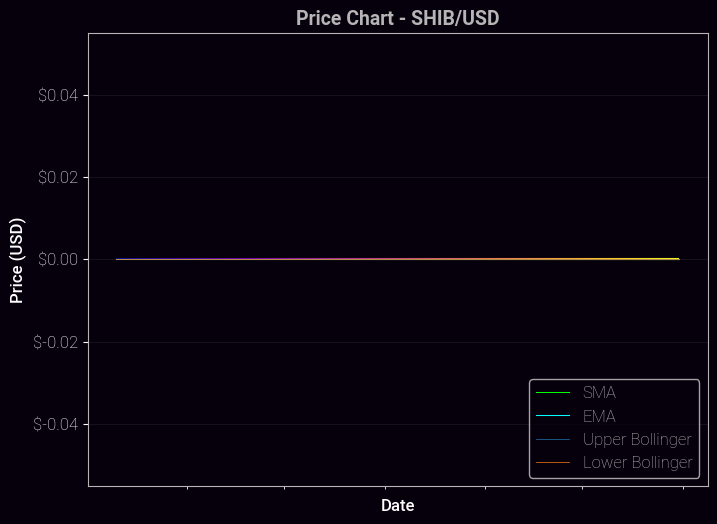

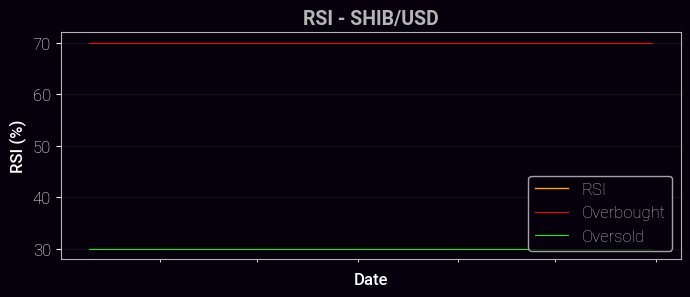

In [7]:
mycursor.execute(rsi(coin, 20))
rsi_table = np.array(mycursor.fetchall())
ax[1].plot(rsi_table[:,0], rsi_table[:,1], color="orange", linewidth=1, label="RSI")
ax[1].plot(rsi_table[:,0], np.full(rsi_table[:,0].size, 70), color="red", linewidth=0.75, label="Overbought")
ax[1].plot(rsi_table[:,0], np.full(rsi_table[:,0].size, 30), color="lime", linewidth=0.75, label="Oversold")
ax[1].legend(loc="lower right")
display(fig)
display(fig2)

/tmp/ipykernel_164130/3608798038.py:8: UserWarning: Attempting to set identical bottom == top == -0.0 results in singular transformations; automatically expanding.
  ax[2].set_ylim([-y_range, y_range])


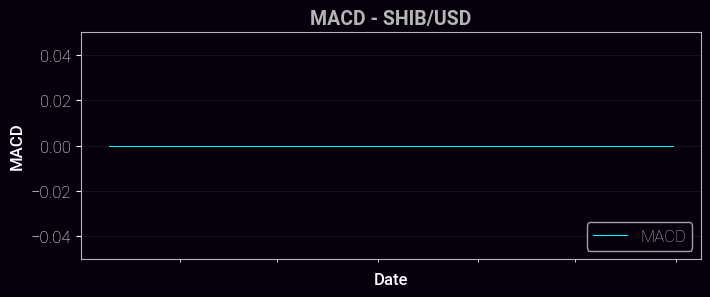

In [8]:
mycursor.execute(ema(coin, 12))
ema_12_table = np.array(mycursor.fetchall())
mycursor.execute(ema(coin, 26))
ema_26_table = np.array(mycursor.fetchall())
macd_table = ema_12_table-ema_26_table
ax[2].plot(ema_12_table[:,0], macd_table[:,1], color="cyan", linewidth=0.75, label="MACD")
y_range = float(max(abs(macd_table[:,1])))*1.25
ax[2].set_ylim([-y_range, y_range])
ax[2].legend(loc="lower right")
display(fig3)

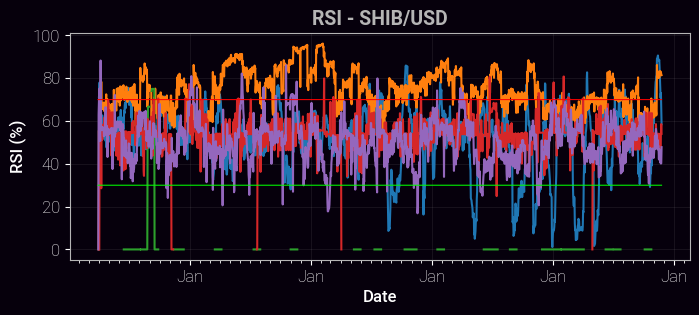

In [9]:
format_graph(fig2, ax[1], coin, graph="rsi")
for coin in ["FFXIV", "GTA", "Tibia", "Habbo", "OSRS"]:
    mycursor.execute(rsi(coin, 20))
    rsi_table = np.array(mycursor.fetchall())
    ax[1].plot(rsi_table[:,0], rsi_table[:,1])
ax[1].plot(rsi_table[:,0], np.full(rsi_table[:,0].size, 70), color="red", linewidth=0.75, label="Overbought")
ax[1].plot(rsi_table[:,0], np.full(rsi_table[:,0].size, 30), color="lime", linewidth=0.75, label="Oversold")
display(fig2)

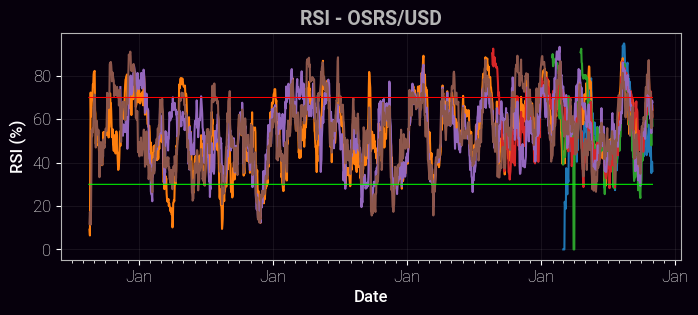

In [10]:
format_graph(fig2, ax[1], coin, graph="rsi")
for coin in ["ADA", "ETH", "DOGE", "DOT", "BNB", "BTC"]:
    mycursor.execute(rsi(coin, 20))
    rsi_table = np.array(mycursor.fetchall())
    ax[1].plot(rsi_table[:,0], rsi_table[:,1])
ax[1].plot(rsi_table[:,0], np.full(rsi_table[:,0].size, 70), color="red", linewidth=0.75, label="Overbought")
ax[1].plot(rsi_table[:,0], np.full(rsi_table[:,0].size, 30), color="lime", linewidth=0.75, label="Oversold")
display(fig2)